# Designate Bike Routes for Commuting Professionals

Traffic congestion has been increasing in cities due to long commutes to and from work.  A simple measure of using bicycles for commuting can prove to be a very effective solution for this problem. This will also be a healthy option for individuals by making them physically active. In order to encourage citizens to use bicycles for commute,  cities need to ensure that there are adequate number of safe bike lanes.

This sample uses ArcGIS API for Python to analyze and select streets for making bike routes for people commuting to and from work in the City of Seattle, Washington. It will demostrate the use tools such as `find_existing_locations`, `create_buffers`, `merge_layers`, `dissolve_boundaries`, `overlay_layers`, `enrich_layer`, and attribute `query`. 

The aim of this analysis is to:

- inrease the number of bike lanes in the city
- ensure that every residence is within 1/2 mile of a bike route
- add  protected bike lanes on busy streets that offer a barrier between the bike lanes and cars on roads, and 
- make sure that atleast 5 percent of the total length of streets have bicycle lanes. This is  a figure that is at par with that of Portland, Oregon, which is one of the most bicycle-friendly cities in the United States. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br/>
<div class="toc"><ul class="toc-item"><li><span><a href="#Workflow" data-toc-modified-id="Workflow-01">Workflow</a></span></li><li><span><a href="#Steps" data-toc-modified-id="Steps-02">Steps</a></span></li><li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-002">Necessary Imports</a></span></li><li><span><a href="#Connect-to-your-ArcGIS-online-organization" data-toc-modified-id="Connect-to-your-ArcGIS-online-organization-1">Connect to your ArcGIS online organization</a></span></li><li><span><a href="#Get-the-data-for-the-analysis." data-toc-modified-id="Get-the-data-for-the-analysis.-2">Get the data for the analysis.</a></span></li><li><span><a href="#find-busy-streets-using-find_existing_locations-tool" data-toc-modified-id="find-busy-streets-using-find_existing_locations-tool-3">find busy streets using find_existing_locations tool</a></span></li><li><span><a href="#Get-madison-street-using-find_existing_locations-tool" data-toc-modified-id="Get-madison-street- using-find_existing_locations-tool-4">Get madison street  using find_existing_locations tool</a></span></li><li><span><a href="#Create-buffer-of-Madison-street" data-toc-modified-id="Create-buffer-of-Madison-street-5">Create buffer of Madison street</a></span></li><li><span><a href="#Get-'10th-Ave-E'/'Broadway-E'-street-using-find_existing_locations-tool" data-toc-modified-id="Get-'10th-Ave-E'/'Broadway-E'-street-using-find_existing_locations-tool-6">Get '10th Ave E'/'Broadway E' street using find_existing_locations tool</a></span></li><li><span><a href="#Create-buffer-of-'10th-Ave-E'/'Broadway-E'-street" data-toc-modified-id="Create-buffer-of-'10th-Ave-E'/'Broadway-E'-street-7">Create buffer of '10th Ave E'/'Broadway E' street</a></span></li><li><span><a href="#Get-'24th-Ave'-and-'23rd-Ave'-street-using-find_existing_locations-tool" data-toc-modified-id="Get-'24th-Ave'-and-'23rd-Ave'-street-using-find_existing_locations-tool-8">Get '24th Ave' and '23rd Ave' street using find_existing_locations tool</a></span></li><li><span><a href="#Determine-the-effectiveness-of-the-selected-routes" data-toc-modified-id="Determine-the-effectiveness-of-the-selected-routes-9">Determine the effectiveness of the selected routes</a></span></li><li><span><a href="#Dissolve-boundaries-to-get-single-polygon" data-toc-modified-id="Dissolve-boundaries-to-get-single-polygon-10">Dissolve boundaries to get single polygon</a></span></li><li><span><a href="#Overlay-layers-to-the-shape-of-Capitol-Hill" data-toc-modified-id="Overlay-layers-to-the-shape-of-Capitol-Hill-11">Overlay layers to the shape of Capitol Hill</a></span></li><li><span><a href="#Enrich-with-population-data" data-toc-modified-id="Enrich-with-population-data-12">Enrich with population data</a></span></li><li><span><a href="#Data-Resources" data-toc-modified-id="Data-Resources-13">Data Resources</a></span></li><li><span><a href="#Summary-of-methods-used" data-toc-modified-id="Summary-of-methods-used-14">Summary of methods used</a></span></li></ul></div>

## Workflow

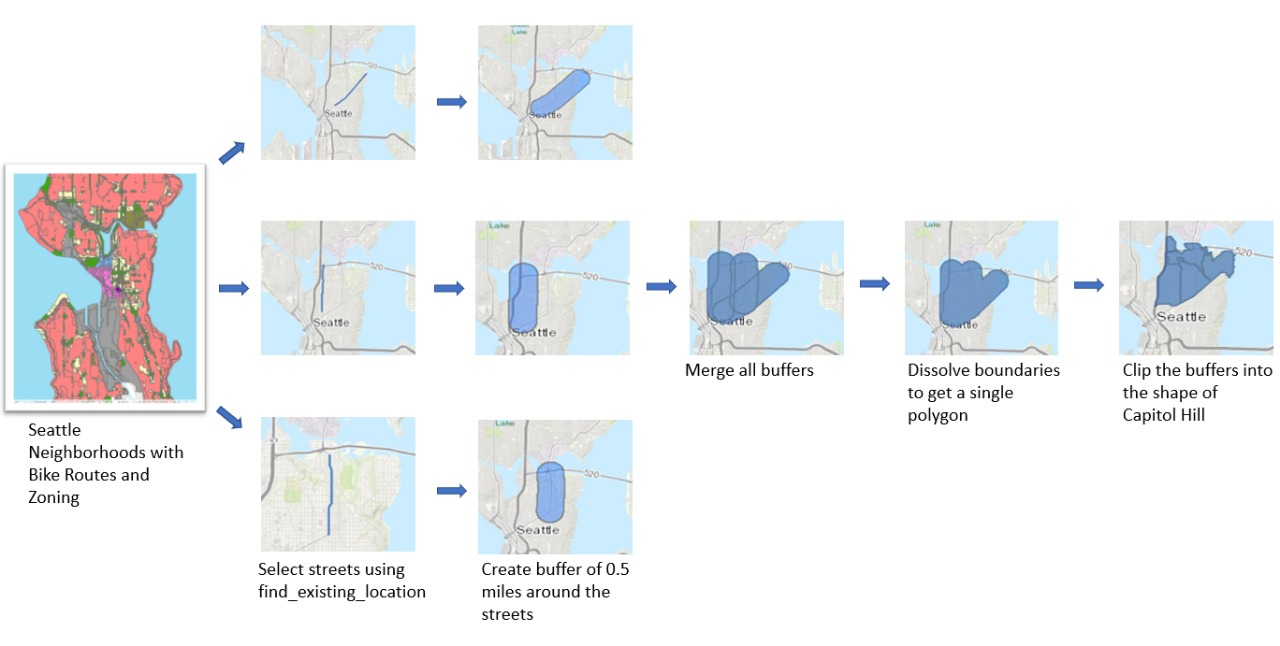

## Steps

We will use the following steps for the analysis:

1) Retrieve the SeattleBikeRoutes layer.
    
2) Filter Seattle's zoning layer by downtown office.

3) Filter neighborhoods layer by Capitol Hill.

4) Check if the bike lanes can be made on trails.

5) Use `find existing_locations` to get arterial streets layer. We use this tool to select the streets which will be the most appropriate for making bike lanes. 
    
6) Select the first street from the results we got from step 5. 

7) Calculate the length of the street.

8) Apply a Buffer of 0.5 miles to this street.

9) Repeat step 6, 7, 8 for the second and third street.

10) Calculate the percentage of road length used for making bike lanes

11) Merge the buffered layers and dissolve boundaries to get a single polygon.

12) Use overlay layers to clip the buffers into the shape of Capitol Hill

13) Enrich the clipped layer by population data using enrich_layer method.

14) Calculate the total population of Capitol Hill that will benefit

### Necessary Imports

In [ ]:
from datetime import datetime as dt

from arcgis import GIS
from arcgis.features import FeatureLayerCollection
from arcgis.features.find_locations import find_existing_locations
from arcgis.features.use_proximity import create_buffers
from arcgis.features.manage_data import merge_layers
from arcgis.features.manage_data import dissolve_boundaries
from arcgis.features.manage_data import overlay_layers
from arcgis.features.enrich_data import enrich_layer

### Connect to  your ArcGIS online organization

In [2]:
gis = GIS('home')

We can use the `search()` method of the content property of our gis object to get the Seattle Bike Routes layer. Since this is public content shared by users outside our organization, we will search for **SeattleBikeRoutes**  and set **outside_org** to True.

### Get the data for the analysis.

<Item title:"SeattleBikeRoutes" type:Feature Layer Collection owner:api_data_owner>
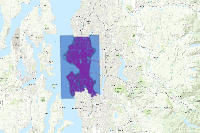

In [3]:
seattle_bike_routes = gis.content.search('title: SeattleBikeRoutes owner: api_data_owner',
                                         'Feature layer')[0]
seattle_bike_routes

We can print the names of the layers in this item and assign them to variables that will be used in our analysis.

In [4]:
for lyr in seattle_bike_routes.layers:
    print(lyr.properties.name)

SeattleBikeRoutes_street
SeattleBikeRoutes_zoning
SeattleBikeRoutes_Neighborhoods


In [5]:
bike_route_streets = seattle_bike_routes.layers[0]

In [6]:
bike_route_zoning = seattle_bike_routes.layers[1]

In [7]:
bike_route_neighbourhood = seattle_bike_routes.layers[2]

## Identify expected commuter neighborhoods

We will set a `filter` on the Zoning layer to select the downtown office core. The downtown office core is a good starting point for creating commuter bike lanes because it is expected to have a large number of commuters each day.

In [8]:
bike_route_zoning.filter = "(ZONELUT_DE = 'Downtown Office Core 1') OR (ZONELUT_DE = 'Downtown Office Core 2')"

Apply a `filter` to the Neighborhoods so that only Capitol Hill shows up.

In [9]:
bike_route_neighbourhood.filter = "L_HOOD = 'CAPITOL HILL'"

### Identify potential bike routes

The Streets layer includes main streets, trails, and other street types. Let's look at the trails first to determine if they can be used for commuting.

Filter the Streets so that only the trails are showing, by setting a definition expression that filters the roads by the segment type of trails (SEGMENT_TY = 8).


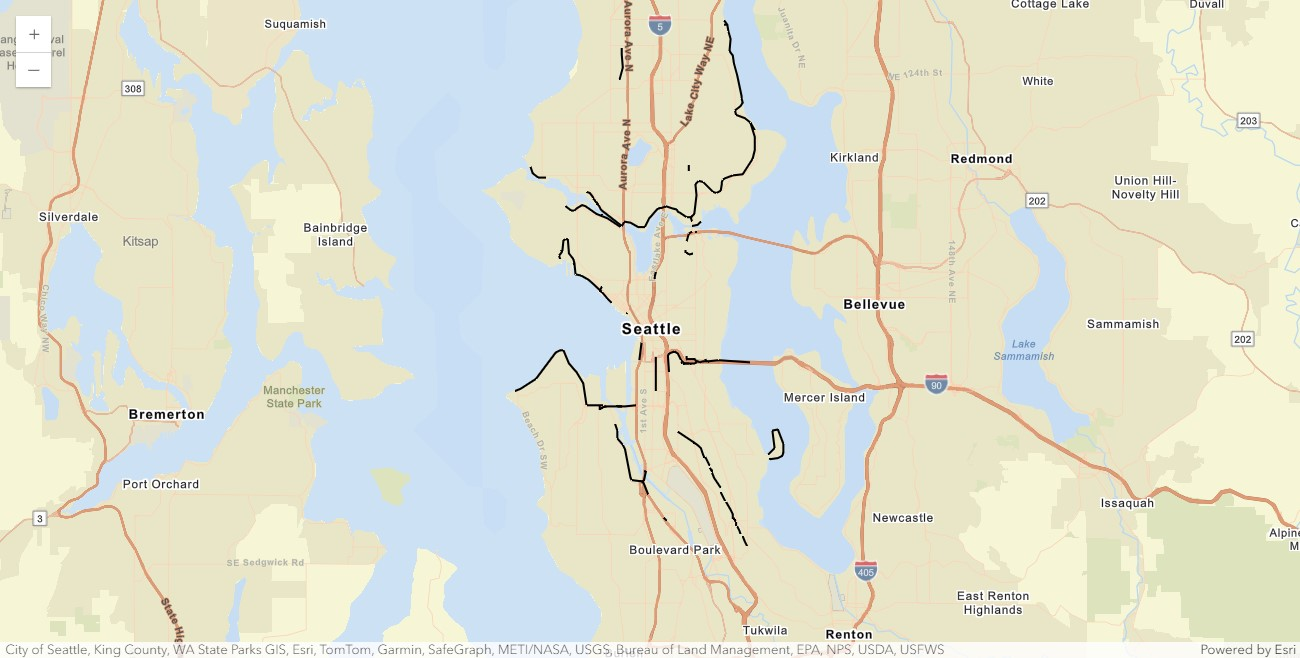

In [104]:
bike_street_filtered_map = gis.map('Seattle')
bike_street_filtered_map.basemap.basemap = "arcgis-streets"
bike_street_filtered_map

In [93]:
bike_route_streets_trails = bike_route_streets.query("SEGMENT_TY = 8") # code for trails
bike_route_streets_trails

<FeatureSet> 185 features

In [94]:
bike_street_filtered_map.content.add(bike_route_streets_trails)

There are only three trails in the neighborhood and they are not long enough to be used for commuting. 

As there are not enough trails in the Capitol Hill neighborhood, the bike lanes will have to be created on pre-existing streets. Since Seattle wants to build protected bike lanes, we will look at busier streets first to find the most direct routes. 

### Find busy streets using find_existing_locations

Let's use `find_existing_locations()` to select the arterial streets (where SEGMENT_TY is 1 and where ARTERIAL_C is 1).

In [95]:
busy_streets = find_existing_locations(input_layers=[{'url': bike_route_streets.url}], 
                                       expressions=[{"operator":"","layer":0,"where":"SEGMENT_TY = 1"},
                                                    {"operator":"and","layer":0,"where":"ARTERIAL_C = 1"}],
                                       output_name='ArterialStreets'+ str(dt.now().microsecond))

{"cost": 26.209}


In [96]:
busy_streets.layers[0].query(return_geometry=False, where='1=1')

<FeatureSet> 6605 features


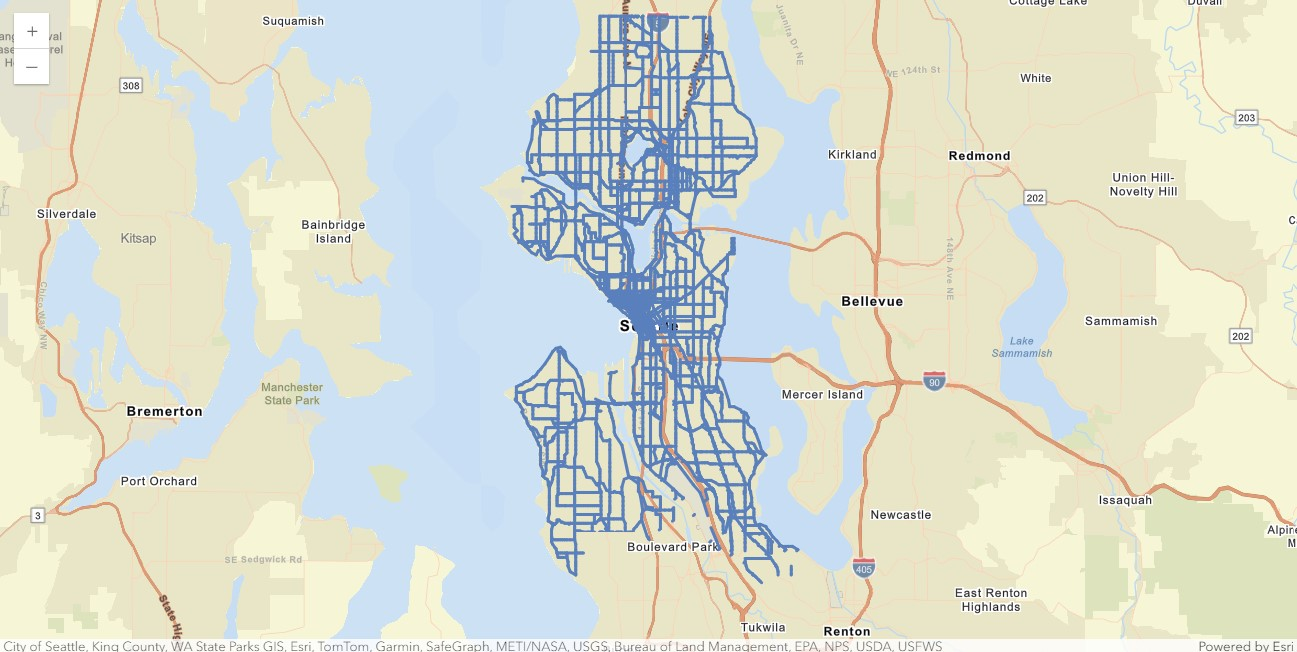

In [105]:
busy_streets_map = gis.map('Seattle')
busy_streets_map.basemap.basemap = "arcgis-streets
busy_streets_map

In [98]:
busy_streets_map.content.add(busy_streets)

Next let's examine the arterial roads in and around the Capitol Hill neighborhood. One road runs through the entire south-eastern side of the neighborhood and into the Downtown Office Core. According to the basemap the street is called E Madison St. 

Click the street and check the information in the pop-up box.

The streets are stored as segments, with their breaks at each intersection, rather than as single continuous lines. Therefore, the segments need to be collected together to be used as a continuous street. The ORD_STREET and ORD_STNAME fields will be used to make street selections.

In [99]:
busy_streets_layer = busy_streets.layers[0]

### Get Madison street using find_existing_locations tool

We will use `find_existing_locations` to select the segments of Madison Street that are within 3.5 feet of Capitol Hill. This distance has to be used because the street shares a border with Capitol Hill and some segments are located just outside of the boundary. Note that the actual bike lane would run all the way to the Downtown Office Core, but in this analysis we determine how well the lanes service a specific neighborhood. So only sections of the road within that neighborhood are required. We will apply the Neighborhoods filter to the tool.

In [30]:
madison_street = find_existing_locations(input_layers=[{'url': busy_streets_layer.url},
                                                       {'url': bike_route_neighbourhood.url, 'filter':"L_HOOD = 'CAPITOL HILL'"}],
                                         expressions=[{"operator":"","layer":0,"where":"ORD_STREET = 'MADISON'"},
                                                      {"operator":"and","layer":0,"selectingLayer":1,
                                                       "spatialRel":"withinDistance","distance":3.5,"units":"Feet"}],
                                         output_name='MadisonStreet'+ str(dt.now().microsecond))

{"cost": 6.61}


In [31]:
madison_street

<Item title:"MadisonStreet694249" type:Feature Layer Collection owner:arcgis_python>

In [32]:
madison_street_lyr = madison_street.layers[0]

In [33]:
stat_1 = madison_street_lyr.query(where='1=1',
                                  returnGeometry=False,
                                  spatialRel='esriSpatialRelIntersects',
                                  outFields='Length',
                                  outStatistics=[{"statisticType":"count","onStatisticField":"Length","outStatisticFieldName":"countField"},
                                              {"statisticType":"sum","onStatisticField":"Length","outStatisticFieldName":"sumField"},
                                              {"statisticType":"min","onStatisticField":"Length","outStatisticFieldName":"minField"},
                                              {"statisticType":"max","onStatisticField":"Length","outStatisticFieldName":"maxField"},
                                              {"statisticType":"avg","onStatisticField":"Length","outStatisticFieldName":"avgField"},
                                              {"statisticType":"stddev","onStatisticField":"Length","outStatisticFieldName":"stddevField"}])

In [34]:
df1 = stat_1.sdf # field statistics

In [35]:
len1 = df1.sumField.values[0]

In [36]:
len1

2.47538356

The length of Madison street is approximately 2.48 miles.

In [37]:
madison_street_layer = madison_street.layers[0]


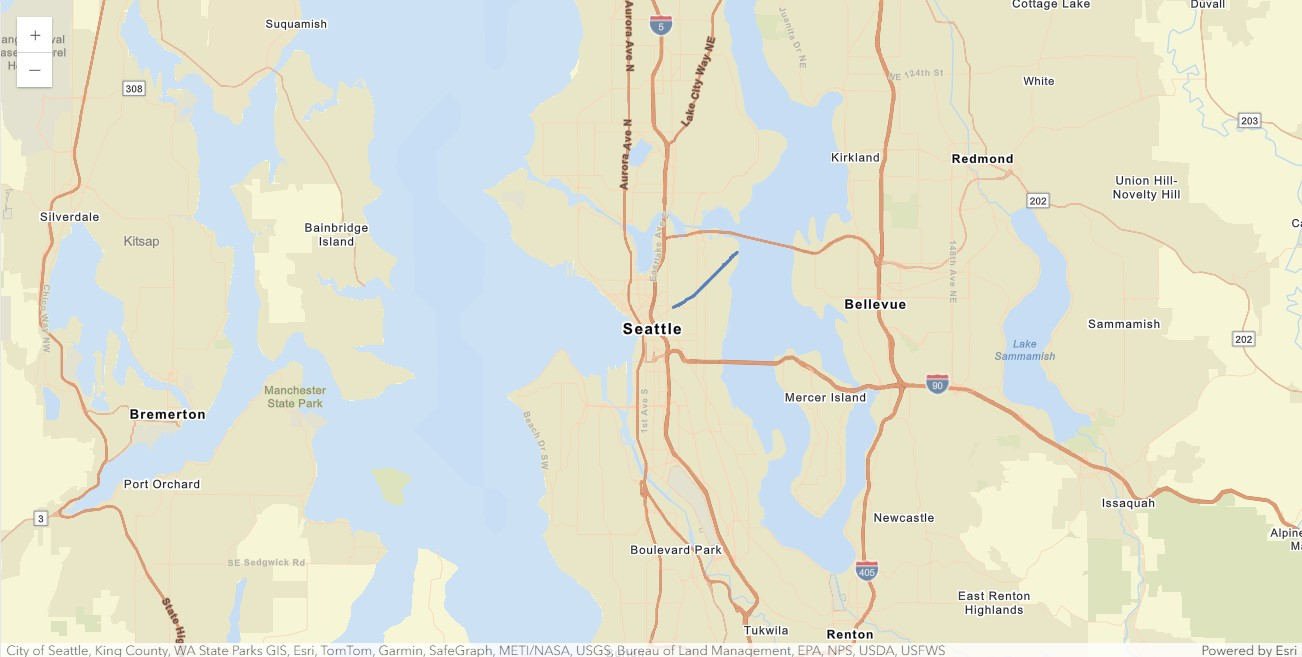

In [106]:
madison_map = gis.map('Seattle')
madison_map.basemap.basemap = "arcgis-streets"
madison_map

In [101]:
madison_map.content.add(madison_street)

### Create buffer of Madison street


We will apply a Buffer of 0.5 miles to Madison Street to determine the area that the bike route would service.

In [40]:
buffer_street = create_buffers(madison_street_layer,
                               dissolve_type='Dissolve',
                               distances=[0.5],
                               ring_type='Rings',
                               units='Miles',
                               output_name="BufferMadisonStreet"+ str(dt.now().microsecond))

{"cost": 0.041}


In [41]:
buffer_street_layer = buffer_street.layers[0]


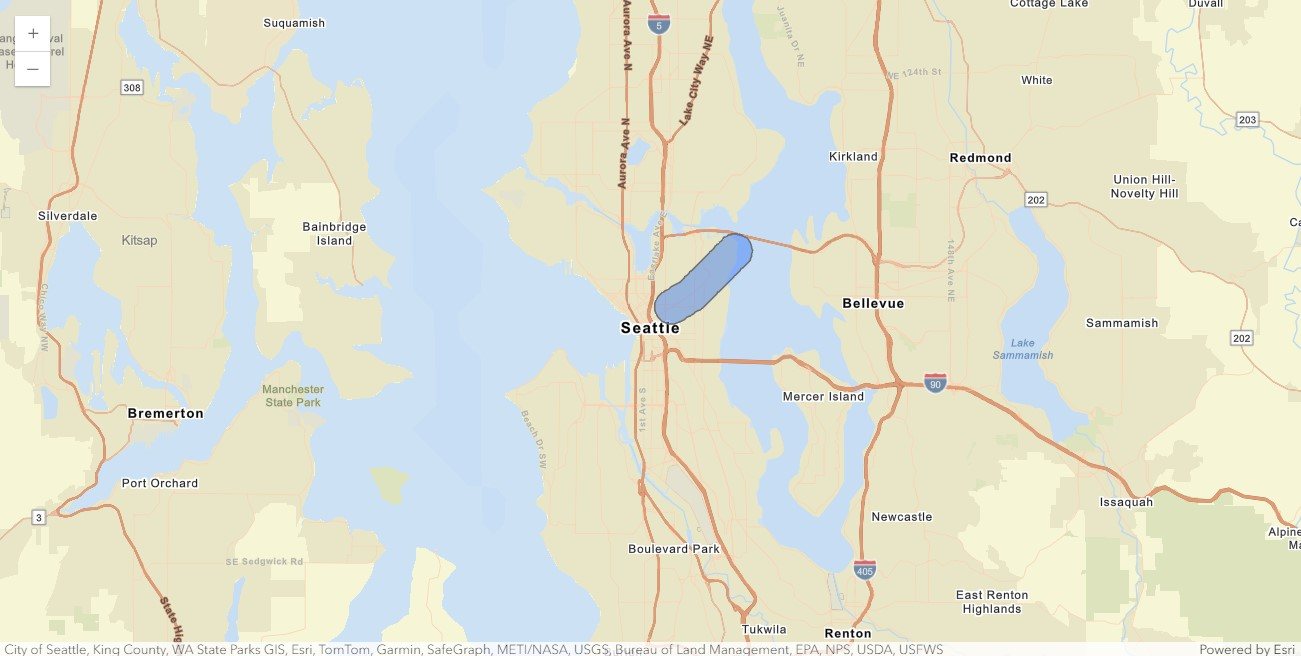

In [107]:
buffer_street_map = gis.map('Seattle')
buffer_street_map.basemap.basemap = "arcgis-streets"
buffer_street_map

In [103]:
buffer_street_map.content.add(buffer_street)

Now we repeat the process (selecting, buffering, and calculating the length of the segments) for 10th Ave E/Broadway E.

### Get '10th Ave E'/'Broadway E' street using find_existing_locations tool

In [44]:
broadway_ave = find_existing_locations(input_layers=[{'url': busy_streets_layer.url},
                                                     {'url': bike_route_neighbourhood.url, 'filter':"L_HOOD = 'CAPITOL HILL'"}],
                                       expressions=[{"operator":"","layer":0,"where":"ORD_STNAME = '10TH AVE E'"},
                                                    {"operator":"or","layer":0,"where":"OBJECTID = 789"},
                                                    {"operator":"or","layer":0,"where":"ORD_STNAME = 'BROADWAY'"},
                                                    {"operator":"or","layer":0,"where":"ORD_STNAME = 'BROADWAY E'"},
                                                    {"operator":"and","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":0.001,"units":"Feet"}],
                                       output_name='Broadway10thAVE'+ str(dt.now().microsecond))

{"cost": 6.61}


In [45]:
broadway_ave_layer = broadway_ave.layers[0]

In [46]:
stat_2 = broadway_ave_layer.query(where='1=1',
                                  returnGeometry=False,
                                  spatialRel='esriSpatialRelIntersects',
                                  outFields='Length',
                                  outStatistics=[{"statisticType":"count","onStatisticField":"Length","outStatisticFieldName":"countField"},{"statisticType":"sum","onStatisticField":"Length","outStatisticFieldName":"sumField"},{"statisticType":"min","onStatisticField":"Length","outStatisticFieldName":"minField"},{"statisticType":"max","onStatisticField":"Length","outStatisticFieldName":"maxField"},{"statisticType":"avg","onStatisticField":"Length","outStatisticFieldName":"avgField"},{"statisticType":"stddev","onStatisticField":"Length","outStatisticFieldName":"stddevField"}])

In [47]:
df2 = stat_2.sdf

In [48]:
len2 = df2.sumField.values[0]

In [49]:
len2

1.98774174

The length of brodaway E street is approximately 2 miles.


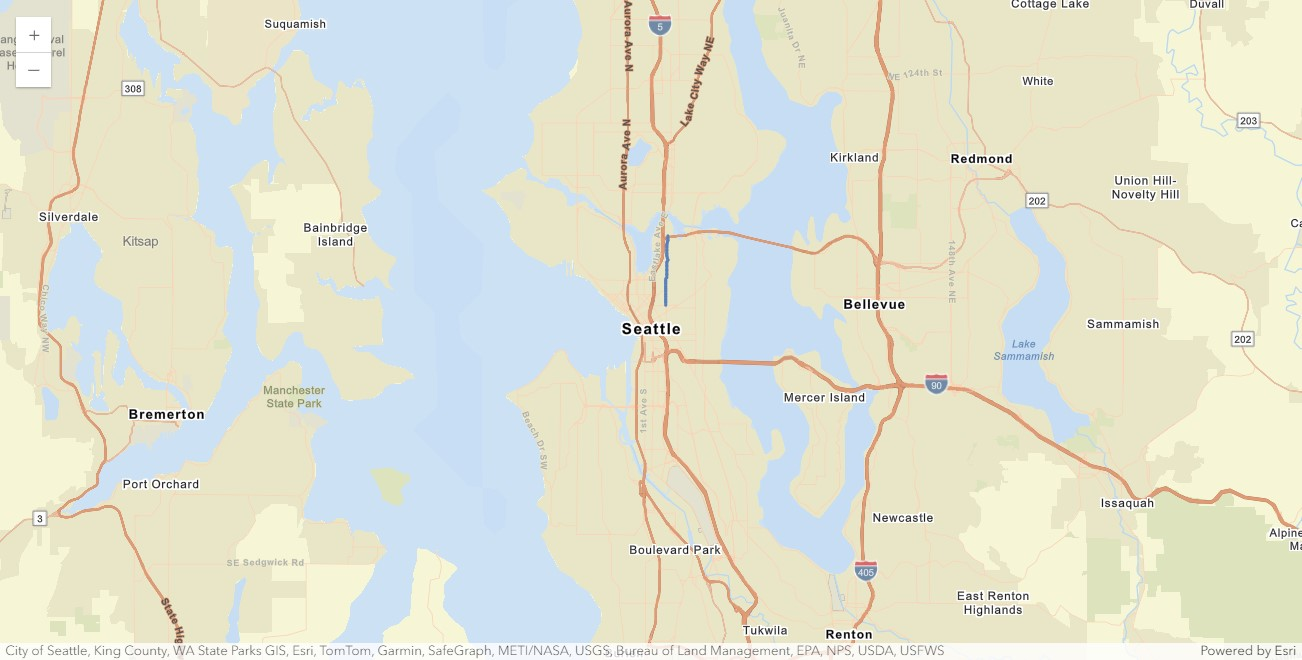

In [108]:
broadway_ave_map = gis.map('Seattle')
broadway_ave_map.basemap.basemap = "arcgis-streets"
broadway_ave_map

In [51]:
broadway_ave_map.content.add(broadway_ave)

### Create buffer of '10th Ave E'/'Broadway E' street

In [ ]:
buffer_street_broadway = create_buffers(broadway_ave_layer,
                                        dissolve_type='Dissolve',
                                        distances=[0.5],
                                        ring_type='Rings',
                                        units='Miles',
                                        output_name="BufferBroadwayStreet"+ str(dt.now().microsecond))


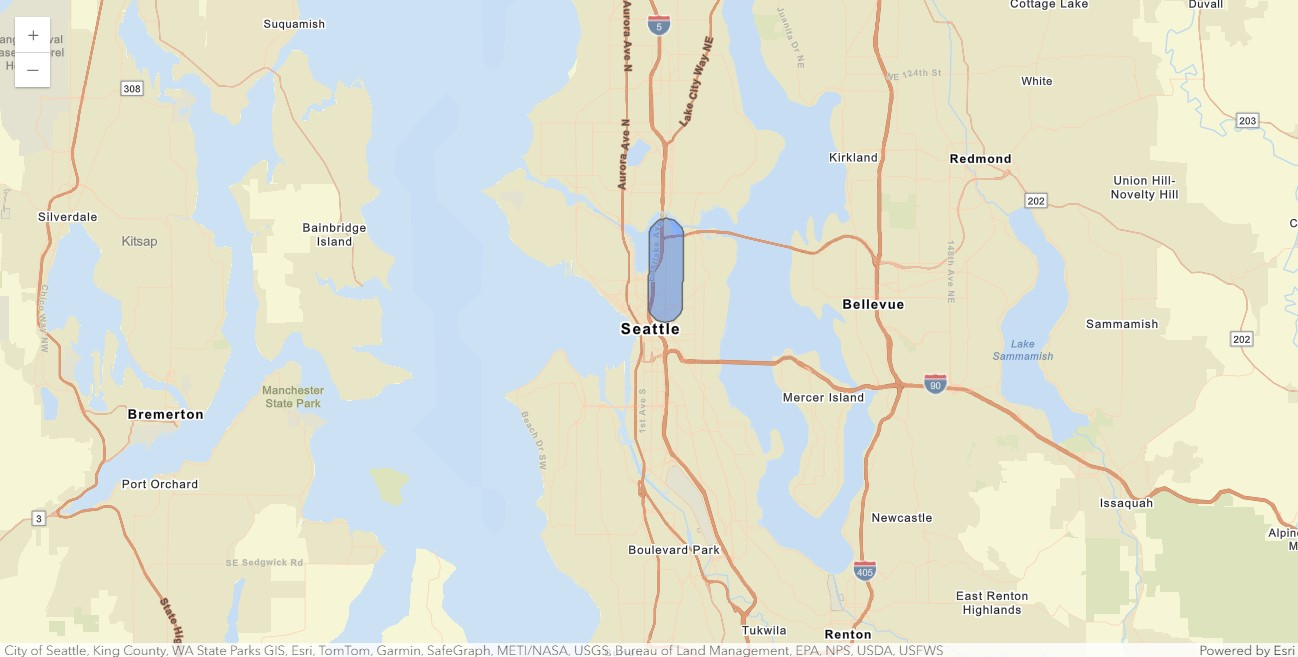

In [110]:
buffer_street_broadway_map = gis.map('Seattle')
buffer_street_broadway_map.basemap.basemap = "arcgis-streets"
buffer_street_broadway_map

In [55]:
buffer_street_broadway_map.content.add(buffer_street_broadway)

Repeat the process once more for 24th Ave and 23rd Ave.

### Get '24th Ave' and '23rd Ave' street using find_existing_locations tool

In [ ]:
ave = find_existing_locations(input_layers=[{'url': busy_streets_layer.url},
                                            {'url': bike_route_neighbourhood.url, 'filter':"L_HOOD = 'CAPITOL HILL'"}],
                              expressions=[{"operator":"","layer":0,"where":"ORD_STNAME = '23RD AVE'"},
                                           {"operator":"or","layer":0,"where":"ORD_STNAME = '23RD AVE E'"},
                                           {"operator":"or","layer":0,"where":"ORD_STNAME = '24TH AVE E'"},
                                           {"operator":"or","layer":0,"where":"ORD_STNAME = 'TURNER WAY E'"},
                                           {"operator":"and","layer":0,"selectingLayer":1,"spatialRel":"withinDistance","distance":0.001,"units":"Feet"}],
                              output_name='23rd24thAve'+ str(dt.now().microsecond))

In [57]:
ave_layer = ave.layers[0]

In [58]:
stat_3 = ave_layer.query(where='1=1',
                         returnGeometry=False,
                         spatialRel='esriSpatialRelIntersects',
                         outFields='Length',
                         outStatistics=[{"statisticType":"count","onStatisticField":"Length","outStatisticFieldName":"countField"},
                                        {"statisticType":"sum","onStatisticField":"Length","outStatisticFieldName":"sumField"},
                                        {"statisticType":"min","onStatisticField":"Length","outStatisticFieldName":"minField"},
                                        {"statisticType":"max","onStatisticField":"Length","outStatisticFieldName":"maxField"},
                                        {"statisticType":"avg","onStatisticField":"Length","outStatisticFieldName":"avgField"},
                                        {"statisticType":"stddev","onStatisticField":"Length","outStatisticFieldName":"stddevField"}])

In [59]:
df3 = stat_3.sdf

In [60]:
len3 = df3.sumField.values[0]

In [61]:
len3

1.63694922

The length of 24th /23rd ave street is approximately 1.6 miles.


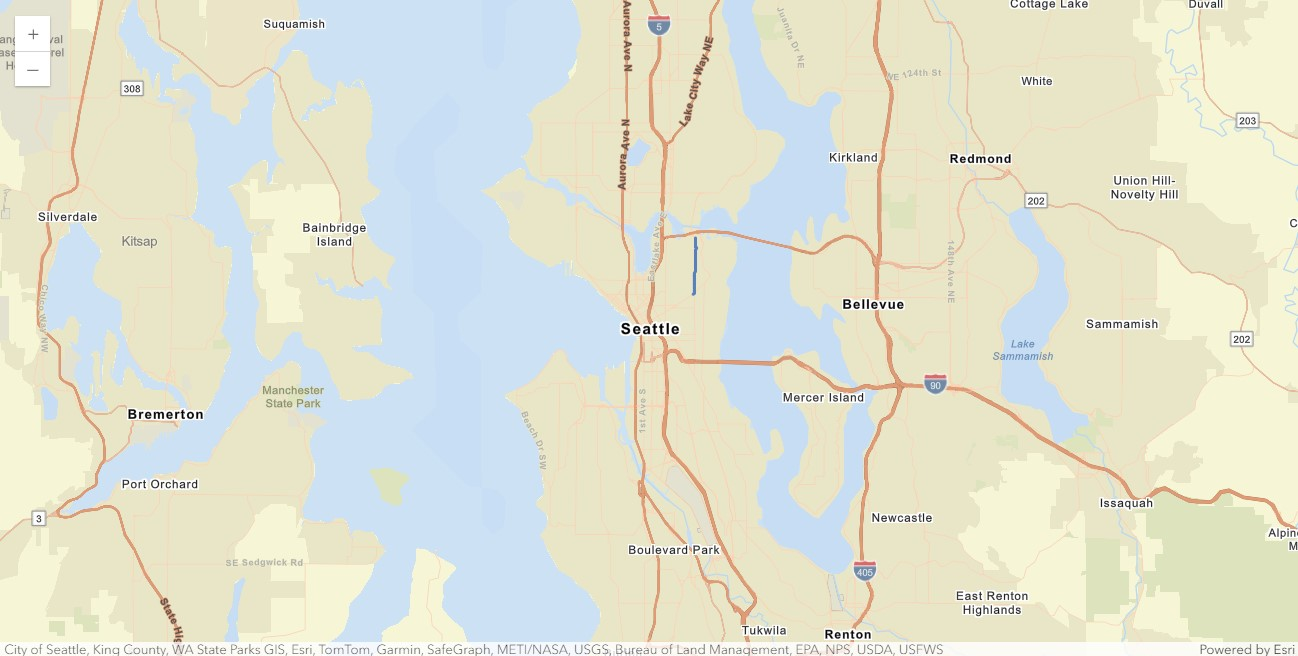

In [111]:
ave_map = gis.map('Seattle')
ave_map.basemap.basemap = "arcgis-streets"
ave_map

In [64]:
ave_map.content.add(ave_layer)

### Create buffer of 23th and 24th ave Street

In [ ]:
buffer_street_ave = create_buffers(ave_layer,
                                   dissolve_type='Dissolve',
                                   distances=[0.5],
                                   ring_type='Rings',
                                   units='Miles',
                                   output_name="Buffer23rd24thAveStreet"+ str(dt.now().microsecond))


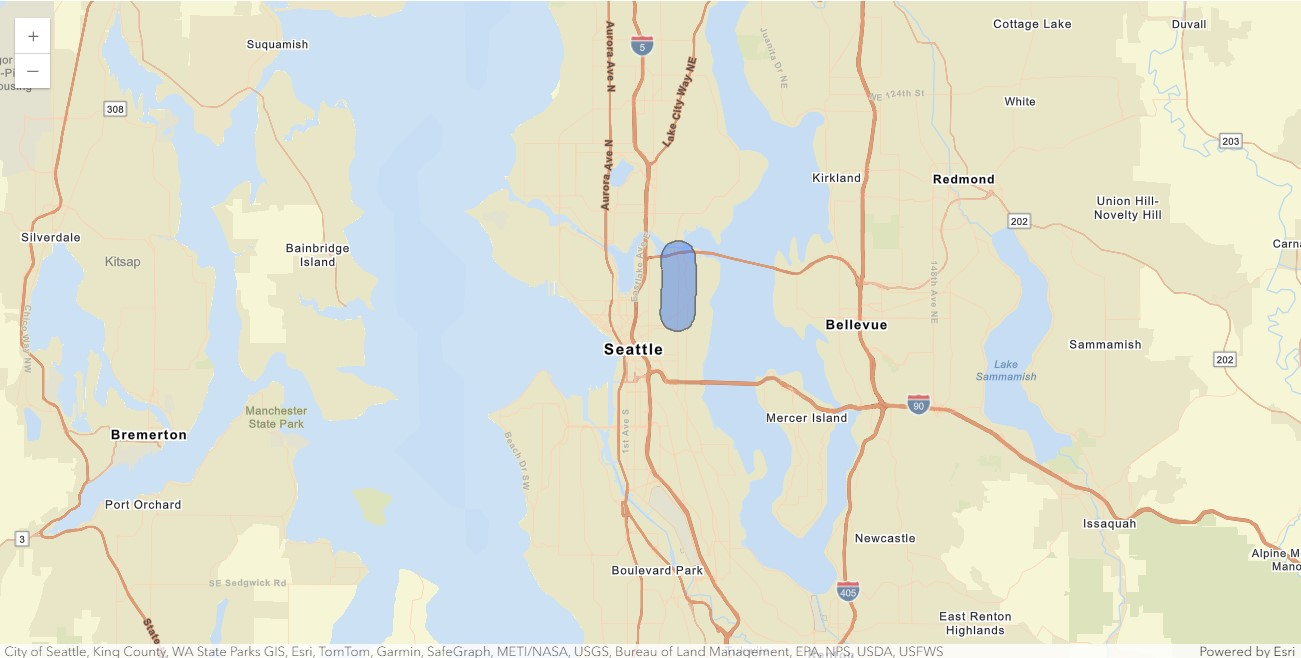

In [112]:
buffer_street_ave_map = gis.map('Seattle')
buffer_street_ave_map.basemap.basemap = "arcgis-streets"
buffer_street_ave_map

In [67]:
buffer_street_ave_map.content.add(buffer_street_ave)

### Determine the effectiveness of the selected routes

Next we will compare the length of potential bike lanes within the neighborhood, to the length of all of the streets within the neighborhood. Select the streets (SEGMENT_TY=1) within Capitol Hill using Find Existing Locations. 

In [ ]:
capitol_hill_streets = find_existing_locations(input_layers=[{'url': bike_route_streets.url},
                                                             {'url': bike_route_neighbourhood.url, 'filter':"L_HOOD = 'CAPITOL HILL'"}],
                                               expressions=[{"operator":"","layer":0,"where":"SEGMENT_TY = 1"},
                                                            {"operator":"and","layer":0,"selectingLayer":1,
                                                             "spatialRel":"withinDistance","distance":3.5,"units":"Feet"}],
                                               output_name='CapitolHillStreet'+ str(dt.now().microsecond))

In [69]:
capitol_hill_lyr = capitol_hill_streets.layers[0]

In [70]:
stat_4 = capitol_hill_lyr.query(where='1=1',
                                returnGeometry=False,
                                spatialRel='esriSpatialRelIntersects',
                                outFields='Length',
                                outStatistics=[{"statisticType":"count","onStatisticField":"Length",
                                               "outStatisticFieldName":"countField"},
                                               {"statisticType":"sum","onStatisticField":"Length","outStatisticFieldName":"sumField"},
                                               {"statisticType":"min","onStatisticField":"Length","outStatisticFieldName":"minField"},
                                               {"statisticType":"max","onStatisticField":"Length","outStatisticFieldName":"maxField"},
                                               {"statisticType":"avg","onStatisticField":"Length","outStatisticFieldName":"avgField"},
                                               {"statisticType":"stddev","onStatisticField":"Length","outStatisticFieldName":"stddevField"}])

In [71]:
stat_4.sdf 

,countField,sumField,minField,maxField,avgField,stddevField
0,1361,93.52469,0.002864,0.944354,0.068718,0.047955


In [72]:
df4 = stat_4.sdf 

In [73]:
len4 = df4.sumField.values[0]

In [74]:
len4

93.52469041

The total length of roads within Capitol Hill is 93.5 miles.

### Percentage of road length used for making bike lanes

In [75]:
((len1 + len2 + len3)/len4)*100

6.522421505228268

The percentage of road length being used within the neighborhood is a little over 6.5 percent which is more than the 5 percent in Portland.

Now we will use the Merge Layers tool to combine the three buffers into a single layer. We will have to run the tool twice to merge all three buffers.

### Merge buffer of three streets to a single layer

In [ ]:
merge_madison_broadway_buffer = merge_layers(buffer_street,
                                             buffer_street_broadway,
                                             output_name='Merge1'+ str(dt.now().microsecond))

In [ ]:
merge_all_buffers = merge_layers(merge_madison_broadway_buffer,
                                 buffer_street_ave,
                                 output_name='Merge2'+ str(dt.now().microsecond))


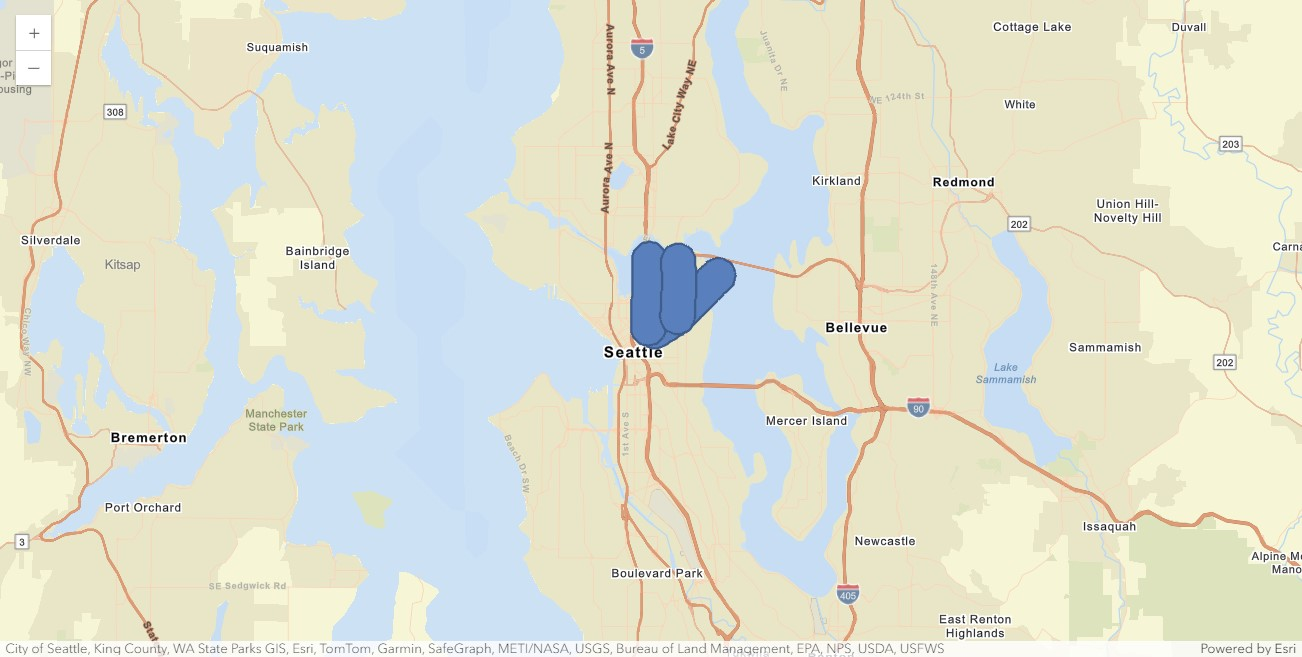

In [113]:
buffer_map = gis.map('Seattle')
buffer_map.basemap.basemap = "arcgis-streets"
buffer_map

In [79]:
buffer_map.content.add(merge_all_buffers)

### Dissolve boundaries to get single polygon

Next we will use Dissolve Boundaries tool on the merged buffers so that all of the buffers are in a single polygon.

In [ ]:
dissolve = dissolve_boundaries(merge_all_buffers,
                               output_name='DissolvedLayers'+ str(dt.now().microsecond))


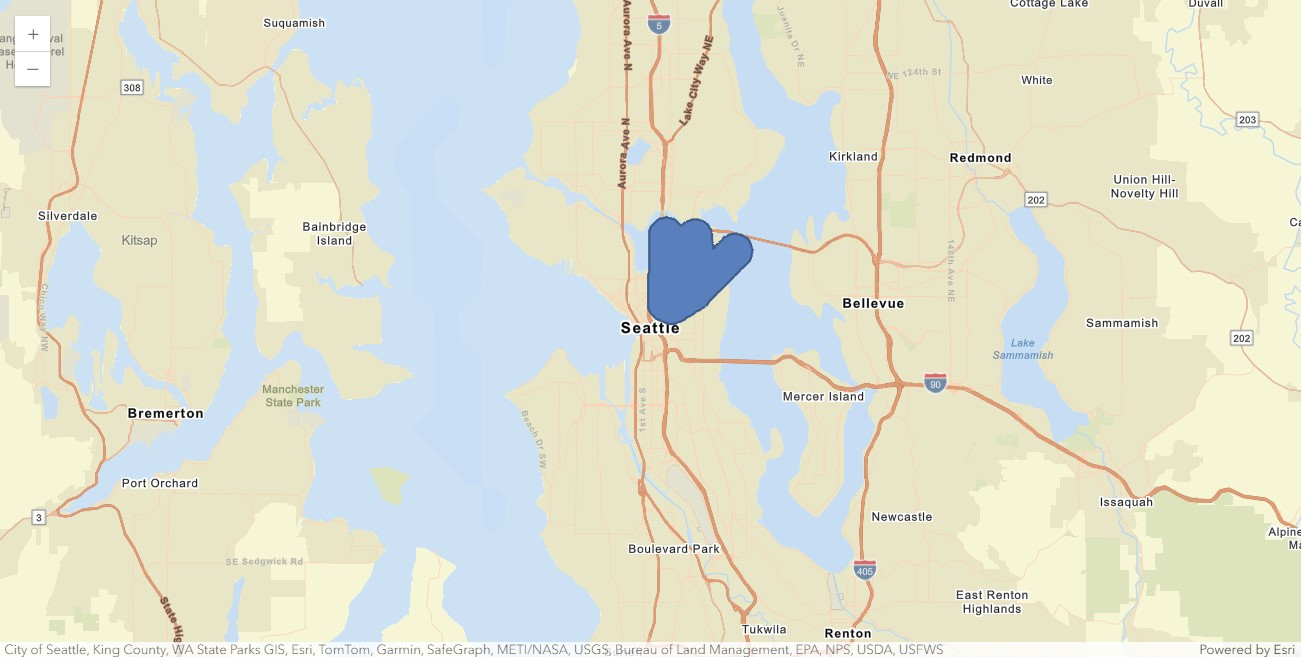

In [114]:
dissolve_map = gis.map('Seattle')
dissolve_map.basemap.basemap = "arcgis-streets"
dissolve_map

In [82]:
dissolve_map.content.add(dissolve)

We will use Overlay Layers tool to clip the dissolved buffers to the shape of Capitol Hill. The clipped buffers will be used to determine the number of Capitol Hill residents that live within 1/2 mile of the bike routes.

### Overlay layers to the shape of Capitol Hill

In [ ]:
cliped_buffer = overlay_layers(dissolve,
                               bike_route_neighbourhood,
                               tolerance=0,
                               context={},
                               output_name="ClipedBuffer"+ str(dt.now().microsecond))

In [84]:
cliped_buffer_layer = cliped_buffer.layers[0]


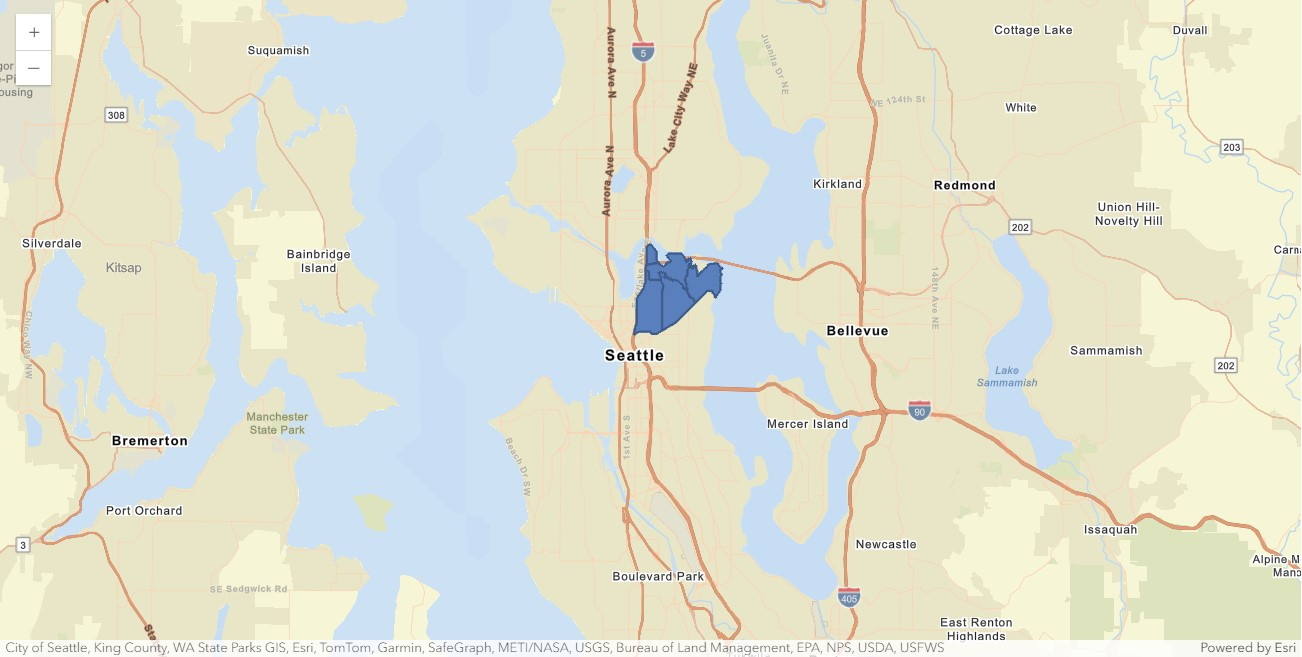

In [115]:
cliped_buffer_map = gis.map('Seattle')
cliped_buffer_map.basemap.basemap = "arcgis-streets"
cliped_buffer_map

In [86]:
cliped_buffer_map.content.add(cliped_buffer)

## Enrich with population data

We will use the Enrich Layer tool to add population data to the clipped layer made in the previous step.  

> **Note:** Organizations should review the [data attributions](https://www.esri.com/en-us/legal/terms/data-attributions) and [Master Agreement](https://www.esri.com/content/dam/esrisites/en-us/media/legal/ma-full/ma-full.pdf) to make sure they are in compliance when geoenriching data and making it available to other systems.

In [ ]:
clipped_enrich = enrich_layer(cliped_buffer_layer, 
                              analysis_variables=["AtRisk.TOTPOP_CY"], 
                              output_name='EnrichByPop'+ str(dt.now().microsecond))

Use Enrich Layer to add population data to Capitol Hill. Use the same population variable as in the previous step.

In [ ]:
capitolhill_enrich = enrich_layer(bike_route_neighbourhood,
                                  analysis_variables=["AtRisk.TOTPOP_CY"],
                                  output_name='CapitolhillEnrichedByPop'+ str(dt.now().microsecond))

In [89]:
clip_lyr = clipped_enrich.layers[0]

In [90]:
stat_5 = clip_lyr.query(where='1=1',
                        returnGeometry=False,
                        spatialRel='esriSpatialRelIntersects',
                        outFields='TOTPOP_CY',
                        outStatistics=[{"statisticType":"count","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"countField"},
                                       {"statisticType":"sum","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"sumField"},
                                       {"statisticType":"min","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"minField"},
                                       {"statisticType":"max","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"maxField"},
                                       {"statisticType":"avg","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"avgField"},
                                       {"statisticType":"stddev","onStatisticField":"TOTPOP_CY","outStatisticFieldName":"stddevField"}])

In [91]:
stat_5.sdf # population statistics

,countField,sumField,minField,maxField,avgField,stddevField
0,5,52490.0,1374.0,29400.0,10498.0,11313.92264


Approximately 49,431 Capitol Hill residents are within ½ mile of the bike routes, which constitutes approximately 99.3% of the neighborhood.

## Data Resources

<table>
  <tr>
    <th>Shapefile</th>
    <th>Source</th>
  </tr>
  <tr>
    <td>Street_Network_Database</td>
    <td>City of Seattle. (2014). Street Network Database. data.seattle.gov.

<br>Downloaded November, 2015 from data.seattle.gov</td>
  </tr>
  <tr>
    <td>BLDG2012_PLGN</td>
    <td>City of Seattle. (2014). BLDG2012. data.seattle.gov.

<br>Downloaded November, 2015 from data.seattle.gov</td>
  </tr>
  <tr>
    <td>Neighborhoods</td>
    <td>City of Seattle. (2014). Neighborhoods. data.seattle.gov.

<br>Downloaded November, 2015 from data.seattle.gov</td>
  </tr>
  <tr>
    <td>City_of_Seattle_Zoning</td>
    <td>City of Seattle. (2014). City of Seattle Zoning. data.seattle.gov.

<br>Downloaded November, 2015 from data.seattle.gov</td>
  </tr>
  <tr>
    <td>SAEP_Census_Block_Groups</td>
    <td>Washington Office of Financial Management. (2015).<br>SAEP Census Block Groups. Small Areas Estimate Program.

<br>Downloaded December, 2015 from ArcGIS Open Data</td>
  </tr>
</table>

## Summary of methods used

This case study demonstrates the following analytical methods that can be adapted to many different application areas.

<table>
  <tr>
    <th>Method</th>
    <th>Generic Question</th>
    <th>Examples</th>  
  </tr>  
  <tr>
    <td>Attribute Query</td>
    <td>Which features have the characteristics I'm interested in?</td>
    <td>Which features have more than 50,000 people and median annual incomes larger than $50,000?<br>Which hospitals have readmission rates larger than 10 percent?</td>  
  </tr>
  <tr>
    <td>Location Query</td>
    <td>Which features are in my area of interest?</td>
    <td>Which hospitals are within the city limits?<br>Which species sightings are within 10 feet of a stream? Which roads intersect with Main Street?</td>
  </tr>
  <tr>
    <td>Buffer features</td>
    <td>What is within a desired distance of my feature?</td>
    <td>How often are deer found within 100 feet of a road?<br>Which cities felt the earthquake at moderate intensity or higher?</td>
  </tr>
  <tr>
    <td>Data Enrich</td>
    <td>Which attributes give more information about an area?</td>
    <td>What is the population in each ZIP Code?</td>
  </tr>
</table>